In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import os, sys
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import copy

import Regularization

In [2]:
def get_data(path):
    image_data_list = []
    label = []
    for i in os.listdir(path):
        if i.endswith('jpg') or i.endswith('png'):
            elements = os.path.join(path, i)
            img = cv2.imread(elements)
            img = cv2.resize(img, (64,64))
            image_data_list.append(img)
            if i.startswith('dog'):
                lab = 1
            else:
                lab = 0
            label.append(lab)
    label = np.array(label)
    image_data_list = np.array(image_data_list)
    plt.imshow(image_data_list[50])
    plt.show() 
    image = image_data_list.shape[0]
    print(image)
    return image_data_list, label

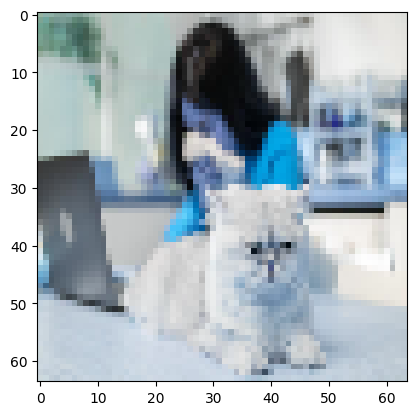

557


In [3]:
path = 'C:/Users/Dell/Desktop/train/Train'
image_data_list, label = get_data(path)

In [4]:
label.shape, image_data_list.shape

((557,), (557, 64, 64, 3))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(image_data_list, label, test_size=0.2, random_state=0)

In [6]:
print('Number of X_train element', X_train.shape[0])
print('Number of X_test element',X_test.shape[0])
print('Number of y_train element',y_train.shape[0])
print('Number of y_test element',y_test.shape[0])

Number of X_train element 445
Number of X_test element 112
Number of y_train element 445
Number of y_test element 112


In [7]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T 
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T 
y_train_flatten = y_train.reshape(y_train.shape[0], -1).T 
y_test_flatten = y_test.reshape(y_test.shape[0],-1).T 

#Scale
X_train_flatten =  X_train_flatten/255.
X_test_flatten = X_test_flatten/255.
print('X_train_flatten shape', X_train_flatten.shape) 
print('X_test_flatten shape', X_test_flatten.shape)
print('y_train_flatten shape', y_train_flatten.shape)
print('y_test_flatten shape', y_test_flatten.shape)

X_train_flatten shape (12288, 445)
X_test_flatten shape (12288, 112)
y_train_flatten shape (1, 445)
y_test_flatten shape (1, 112)


In [8]:
#Initialization of parameters

def init_params(X):
    np_x = X.shape
    np_h = 10
    np_y = 1
    return np_x, np_h, np_y


In [9]:
# Generate Weights and bias
def weight_params(np_x, np_h, np_y):
    #first Weight (W1)
    W1 = np.random.randn(np_h, np_x) * 0.01    
    #First bias (b1)
    b1 = np.zeros((np_h,1))         
    #Second weight (W2)
    W2 = np.random.randn(np_y,np_h) * 0.01   
    #Second bias (b2)
    b2 = np.zeros((np_y,1))
    
    parameters = {'W1':W1, 'b1': b1, 'W2':W2, 'b2': b2} 
    return parameters
    
#creating activation functions
#Sigmoid activation
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A 

#Sigmoid back
def sigmoid_back(Z):
    s = sigmoid(Z)
    s_back = s(1-s)
    return s_back

#Relu activation
def tanh_func(Z):
    A = np.tanh(Z)
    return A
#Tanh_back
def tanh_back(Z):
    t_back = 1- np.tanh(Z)**2
    return t_back
#Forward propagation
def forward(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #Calculate Z1 and Z2,
    #Calculate A1 and A2,
    Z1 = np.dot(W1,X) + b1
    A1 = tanh_func(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    forward_params = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    
    return forward_params

#Defining cost function
def Cost(Y, forward_params):
    m = Y.shape[1]
    A2 = forward_params['A2']
    costs = -1 / m * (np.dot(Y , np.log(A2).T) + np.dot(1-Y, np.log(1-A2).T))
    costs = np.squeeze(costs)
    return costs


# Backpropagation
def backprop(X, Y, parameters, forward_params):
    m = Y.shape[1]
    #call wight params
    W1 = parameters['W1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #Call forward params
    A1 = forward_params['A1']
    Z1 = forward_params['Z1']
    A2 = forward_params['A2']
    Z2 = forward_params['Z2']
    
    #Retrun Sigmoid back
    th_back = tanh_back(Z1)
    dZ2 = A2- Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * th_back
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1,axis=1, keepdims=True)
    
    back_params = {
        'dW2': dW2,
        'dW1': dW1,
        'db2': db2,
        'db1': db1
    }
    
    return back_params

#weight optimization
def Weight_optimization(back_params, parameters, learning_rate = 0.01):
    #Call weight and bias parameters
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    #call backpropagation parameters
    dW1 = back_params['dW1']
    dW2 = back_params['dW2']
    db1 = back_params['db1']
    db2 = back_params['db2']
    
    # run optimization
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parameters ={
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }
    return parameters

def predict(x,y, parameters):
    m = y.shape[1]
    prob = np.zeros((1,m))
    pred = forward(x, parameters)
    A2 = pred['A2']
    for i in range(0, A2.shape[1]):
        if A2[0,i] > 0.5:
            prob[0,i] = 1
        else:
            prob[0,i] = 0
    prediction = prob
    accuracy = np.sum((prob == y)/m)
    return accuracy, prediction
    
    

In [10]:
#Build model
def Model(X, Y, num_iterations=1000, print_cost = False):
    
    np_x = X.shape[0]
    np_h = 10
    np_y = 1
    Loss = []
    iter = []
    accuracies = []
    parameters = weight_params(np_x,np_h,np_y)
    old_params = copy.deepcopy(parameters)
    for i in range(num_iterations):
        
        f_params  = forward(X, parameters)
        cost =  Cost(Y, f_params)
        b_params = backprop(X, Y, parameters, f_params)
        parameters = Weight_optimization(b_params, parameters, learning_rate = 0.001)
        accuracy, pred = predict(X, Y, parameters)
        if print_cost and i%100 == 0:
            a = f'Epochs: {i}>>>>>>>>>>>>>>>>>>>>>>>> Loss: {cost}, acc: {accuracy}'
            print(a)
            Loss.append(cost)
            iter.append(i)
            accuracies.append(accuracy)
        all_params = {'iter': iter, 'Loss': Loss, 'accuracy': accuracies, 
                      'f_params': f_params,'parameters': parameters, 'pred':pred}
    return all_params

In [11]:
all = Model(X_train_flatten,y_train_flatten,num_iterations=20000,print_cost=True)

Epochs: 0>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.693171786258961, acc: 0.4786516853932584
Epochs: 100>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6929971954364572, acc: 0.4921348314606742
Epochs: 200>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6928343843896959, acc: 0.5460674157303371
Epochs: 300>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6926780726387616, acc: 0.5438202247191013
Epochs: 400>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6925239155770414, acc: 0.5235955056179776
Epochs: 500>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6923679839213784, acc: 0.5280898876404495
Epochs: 600>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6922063772782999, acc: 0.5460674157303371
Epochs: 700>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6920350193166741, acc: 0.5393258426966293
Epochs: 800>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6918496388837765, acc: 0.5393258426966293
Epochs: 900>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6916458896691886, acc: 0.5370786516853934
Epochs: 1000>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6914195334927717, acc: 0.5370786516853934
Epochs: 1100>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.69116660788

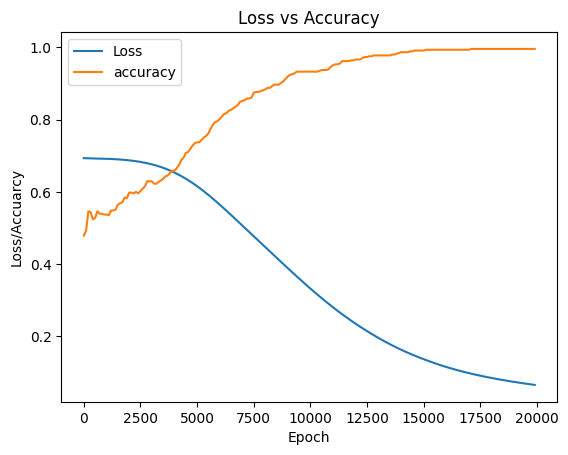

In [12]:
plt.plot(all['iter'], all['Loss'], all['iter'], all['accuracy'])
plt.legend(['Loss', 'accuracy'])
plt.title('Loss vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuarcy')
plt.show()

In [13]:
A1 = all['f_params']['A1']
A2 = all['f_params']['A2']
Z1 = all['f_params']['Z1']
Z2 = all['f_params']['Z2']
w2 = all['parameters']['W2']
print(A1.shape)
print(A2.shape)
print(Z1.shape)
print(Z2.shape)
print(w2)
print(np.sum(w2**2))

(10, 445)
(1, 445)
(10, 445)
(1, 445)
[[-0.82094532  1.0475103   0.78490566  1.04059088 -0.88178033  0.29662912
  -0.07781771 -0.8798457   0.14358335 -0.13682303]]
5.155181486241594


In [14]:
import sklearn
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer(return_X_y=True)
B,c = breast

In [15]:
B = np.array(B)
c = np.array(c)

B_train, B_test, c_train, c_test = train_test_split(B,c, test_size=0.2)
print(B_train.shape)
print(B_test.shape)
print(c_train.shape)
print(c_test.shape)
print(B_train.shape[0])

(455, 30)
(114, 30)
(455,)
(114,)
455


In [16]:
B_train = B_train.reshape(B_train.shape[0], B_train.shape[1]).T
B_test =  B_test.reshape(B_test.shape[0], B_test.shape[1]).T
c_train = c_train.reshape(c_train.shape[0],-1).T
c_test = c_test.reshape(c_test.shape[0],-1).T
print(B_train.shape)
print(B_test.shape)
print(c_train.shape)
print(c_test.shape)

(30, 455)
(30, 114)
(1, 455)
(1, 114)


In [17]:
all = Model(B_train,c_train,num_iterations=50000,print_cost=True)

Epochs: 0>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6929885674578667, acc: 0.6263736263736263
Epochs: 100>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6788790715220565, acc: 0.6263736263736263
Epochs: 200>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.666732606259444, acc: 0.6263736263736263
Epochs: 300>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6529927093302789, acc: 0.6263736263736263
Epochs: 400>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6389877399620203, acc: 0.6263736263736263
Epochs: 500>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6265486874801092, acc: 0.6263736263736263
Epochs: 600>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6278191536227157, acc: 0.6263736263736263
Epochs: 700>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.6046803207374445, acc: 0.6263736263736263
Epochs: 800>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.5979671589277149, acc: 0.6263736263736263
Epochs: 900>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.5845620818104523, acc: 0.6263736263736263
Epochs: 1000>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.575071200240603, acc: 0.6263736263736263
Epochs: 1100>>>>>>>>>>>>>>>>>>>>>>>> Loss: 0.565046418578

In [18]:
A1 = all['f_params']['A1']
A2 = all['f_params']['A2']
Z1 = all['f_params']['Z1']
Z2 = all['f_params']['Z2']
print(A1.shape)
print(A2.shape)

(10, 455)
(1, 455)


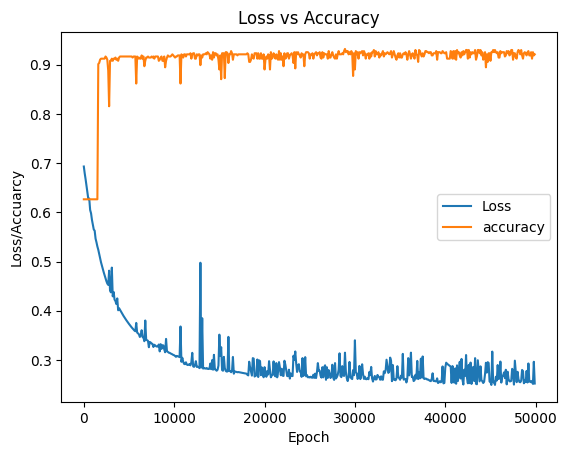

In [19]:
plt.plot(all['iter'], all['Loss'], all['iter'], all['accuracy'])
plt.legend(['Loss', 'accuracy'])
plt.title('Loss vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuarcy')
plt.show()

In [20]:
from Regularization_all import *

In [21]:
another = models_all(X_train_flatten,y_train_flatten,0.01,0.8,0,20000,print_cost=True)


Epochs: 0: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.6931458407593516, Accuracy: 0.5123595505617977
Epochs: 100: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.6929667462866831, Accuracy: 0.5146067415730337
Epochs: 200: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.6928715461204915, Accuracy: 0.5146067415730337
Epochs: 300: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.6928119517180977, Accuracy: 0.5146067415730337
Epochs: 400: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.6927753731236757, Accuracy: 0.5146067415730337
Epochs: 500: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.6927542577607437, Accuracy: 0.5146067415730337
Epochs: 600: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.6927303131595604, Accuracy: 0.5146067415730337
Epochs: 700: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.6927154954965277, Accuracy: 0.5146067415730337
Epochs: 800: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.692711757714307, Accuracy: 0.5146067415730337
Epochs: 900: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.692698225522208, Accuracy: 0.5146067415730337
Epochs: 1000: >>>>>>>>>>

C:\Users\Dell\PycharmProjects\Deep Learning\Regularization_all.py:91: RuntimeWarning: divide by zero encountered in log
  cost = -1. / m * (np.dot(Y, np.log(A3).T) + np.dot(1 - Y, np.log(1 - A3).T))


Epochs: 14300: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.011797752271646953, Accuracy: 1.0
Epochs: 14400: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.00849753528302986, Accuracy: 1.0
Epochs: 14500: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.006230349628387252, Accuracy: 1.0
Epochs: 14600: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.010127522501350196, Accuracy: 0.9977528089887641
Epochs: 14700: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.003906735015023724, Accuracy: 0.9955056179775281
Epochs: 14800: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: nan, Accuracy: 1.0
Epochs: 14900: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.01601859719611799, Accuracy: 0.9977528089887641
Epochs: 15000: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.010072111336653788, Accuracy: 1.0
Epochs: 15100: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.0086791088236921, Accuracy: 0.9977528089887641
Epochs: 15200: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: nan, Accuracy: 1.0
Epochs: 15300: >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Cost: 0.00840544241804474, Accuracy: 1.0
Epochs: 15400: >>>>>>>

NameError: name 'test_pred1' is not defined

In [ ]:
plt.plot(another['iters'], another['costs'], another['iters'], another['accuracy'])
plt.legend(['Loss', 'accuracy'])
plt.title('Loss vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuarcy')
plt.show()

In [ ]:
another = models_all(X_train_flatten,y_train_flatten,0.01,1,1,20000,print_cost=True)

In [ ]:
plt.plot(another['iters'], another['costs'], another['iters'], another['accuracy'])
plt.legend(['Loss', 'accuracy'])
plt.title('Loss vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuarcy')
plt.show()